# K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

In [1]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

SyntaxError: invalid syntax (<ipython-input-1-de26e439c0aa>, line 23)

## クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


《シンプルデータセット3》

In [12]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [13]:
X.shape

(100, 2)

## 学習
K-meansの学習に必要な要素を順番に作成していきます。

## 【問題1】中心点の初期値を決める
入力されたデータからK個の中心点μ1からμKの初期値を決めるコードを作成してください。Kは指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点Xnの中からランダムに K個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点μの初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def choose_initnum(self, X):
    init_num = np.random.choice(X.shape[0], self.n_clusters, replace=False)

    return X[init_num, :]

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化するrnkとμkを求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

n: データ点のインデックス

k: クラスタのインデックス

Xn: n番目のデータ点

μk: k番目の中心点

rnk: データ点Xnがクラスタkに所属していたら1、そうでなければ0

In [4]:
def calc_sse(self, X):
    sse_sum = 0
    for i in range(X.shape[0]):
        cl_num = self.cluster[i]
        cl_num = int(cl_num)
        sse_sum += np.linalg.norm(X[i] - self.centroids[cl_num])
    return sse_sum

## クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

- 中心点μkを固定した上でSSEを最小化する クラスタの割り当てrnkを選ぶ。
- クラスタの割り当てrnkを固定した上で SSEを最小化する中心点μkを選ぶ。

最初の中心点μkは問題1で作成した初期値です。

順番に見ていきます。

## 【問題3】クラスタへの割り当て
全てのデータ点Xnを最も近い中心点μkに割り当てるコードを作成してください。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル p,qに対しては以下の数式で表現できます。

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点μkを固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [5]:
def nearest_cluster(self, X):
    self.centroids = self.choose_initnum(X)
    self.cluster = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        dist = np.zeros(self.n_clusters)
        for j in range(self.n_clusters):  
            dist[j] = np.linalg.norm(X[i] - self.centroids[j])

        self.cluster[i] = np.argmin(dist)
    return self

## 【問題4】中心点の移動
中心点μkをk番目のクラスタに割り当てられる全てのデータ点Xnの平均値（重心）に移動するコードを作成してください。


クラスタの割り当てrnkを固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [6]:
def move_center(self, X):
    self.gap = 0
    for i in range(self.n_clusters):
        self.gap += (self.centroids[i] - np.mean(X[self.cluster==i], axis=0)).sum()
        self.centroids[i] = np.mean(X[self.cluster==i], axis=0)

    return self

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点μkと重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [7]:
def roop(self, X):
    for i in range(self.max_iter):
        self.nearest_cluster(X)
        self.move_center(X)
        if self.gap <= self.tol:
            break
    return self 

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点μkを保持しておきます。

In [8]:
def fit(self, X):
    """
    K-meansによるクラスタリングを計算
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    if self.verbose:
        #verboseをTrueにした際は学習過程を出力
        print()

    sse = np.zeros(self.n_init)
    centroids = []
    for i in range(self.n_init):  
        self.roop(X)
        sse[i] = self.calc_sse(X)
        centroids.append(self.centroids)

    self.best_sse = np.min(sse)
    self.best_centroids = centroids[np.argmin(sse)]

    return self

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


- データ点Xnと学習で決まった中心点μkに対し、SSEを最小化するrnkを選ぶ。

具体的には次のことです。

- データ点Xnを最も近いμkに割り当てる。

In [9]:
def predict(self, X):
    """
    入力されたデータがどのクラスタに属するかを計算
    """
    centroids = self.choose_initnum(X)   
    cluster = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        dist = np.zeros(self.n_clusters)
        for j in range(self.n_clusters):  
            dist[j] = np.linalg.norm(X[i] - centroids[j])
        cluster[i] = np.argmin(dist)
    return cluster

In [292]:
def predict(self, X):
    """
    入力されたデータがどのクラスタに属するかを計算
    """  
    cluster = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        dist = np.zeros(self.n_clusters)
        for j in range(self.n_clusters):  
            dist[j] = np.linalg.norm(X[i] - self.centroids[j])
        cluster[i] = np.argmin(dist)
    return cluster

In [293]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()

        sse = np.zeros(self.n_init)
        centroids = []
        for i in range(self.n_init):  
            self.roop(X)
            sse[i] = self.calc_sse(X)
            centroids.append(self.centroids)

        self.best_sse = np.min(sse)
        self.best_centroids = centroids[np.argmin(sse)]

        return self
    
    def roop(self, X):
        for i in range(self.max_iter):
            self.nearest_cluster(X)
            self.move_center(X)
            if self.gap <= self.tol:
                break
        return self
    
    def move_center(self, X):
        self.gap = 0
        for i in range(self.n_clusters):
            self.gap += (self.centroids[i] - np.mean(X[self.cluster==i], axis=0)).sum()
            self.centroids[i] = np.mean(X[self.cluster==i], axis=0)

        return self
    
    def nearest_cluster(self, X):
        self.centroids = self.choose_initnum(X)
        self.cluster = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            dist = np.zeros(self.n_clusters)
            for j in range(self.n_clusters):  
                dist[j] = np.linalg.norm(X[i] - self.centroids[j])
            self.cluster[i] = np.argmin(dist)
        return self
    
    def calc_sse(self, X):
        sse_sum = 0
        for i in range(X.shape[0]):
            cl_num = self.cluster[i]
            cl_num = int(cl_num)
            sse_sum += np.linalg.norm(X[i] - self.centroids[cl_num])
        return sse_sum
        
    def choose_initnum(self, X):
        init_num = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[init_num, :]

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """  
        cluster = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            dist = np.zeros(self.n_clusters)
            for j in range(self.n_clusters):  
                dist[j] = np.linalg.norm(X[i] - self.centroids[j])
            cluster[i] = np.argmin(dist)
        return cluster


In [299]:
km = ScratchKMeans(n_clusters=4,
                   n_init=10, 
                   max_iter=300, 
                   tol=1e-4)
km.fit(X)

In [300]:
y_km = km.predict(X)
y_km

array([2., 0., 2., 2., 2., 2., 3., 0., 2., 0., 0., 0., 0., 0., 0., 1., 1.,
       3., 3., 1., 2., 0., 3., 1., 2., 3., 3., 2., 1., 1., 1., 0., 1., 1.,
       3., 2., 0., 1., 0., 3., 2., 3., 0., 3., 3., 0., 1., 3., 2., 2., 2.,
       1., 3., 3., 3., 0., 0., 1., 1., 0., 0., 1., 1., 2., 1., 0., 3., 3.,
       1., 2., 0., 1., 2., 0., 2., 2., 3., 3., 1., 1., 1., 0., 3., 2., 1.,
       3., 1., 1., 2., 2., 2., 3., 2., 3., 3., 0., 0., 3., 0., 2.])

In [301]:
print(km.best_sse)
print(km.best_centroids)

64.36694604349611
[[-1.26811733  7.76378266]
 [-1.61318321  3.06863899]
 [ 1.99186903  0.96561071]
 [ 0.77324009  4.23350408]]


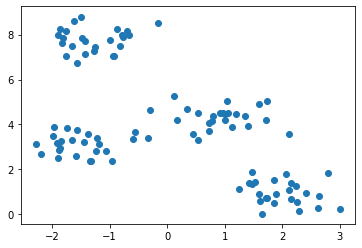

In [302]:
plt.scatter(X[:, 0], X[:, 1])

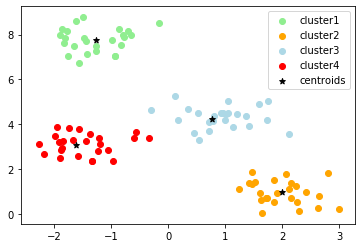

In [303]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightgreen', label='cluster1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], c='orange', label='cluster2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], c='lightblue', label='cluster3')
plt.scatter(X[y_km==3, 0], X[y_km==3, 1], c='red', label='cluster4')

plt.scatter(km.best_centroids[:, 0], km.best_centroids[:, 1], c='black', 
            marker='*', label='centroids')

plt.legend()
plt.show()

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数kは人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数kを検討するためのコードを作成してください。


SSEを縦軸、クラスタ数kを横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

264.23375429919724
169.51988741812653
103.9156949601737
62.63796180120853
58.91784980210224
55.132335067578886
51.98719100754231
48.958045421104764
47.20914238246891
44.737887602948064


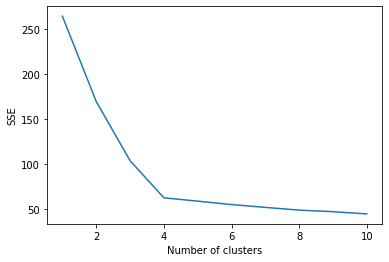

In [304]:
distortions = []
for i in range(1, 11):
    km = ScratchKMeans(n_clusters=i,
                   n_init=100, 
                   max_iter=400, 
                   tol=0.01)
    km.fit(X)
    km.predict(X)
    print(km.best_sse)
    distortions.append(km.best_sse)
    
plt.plot(range(1, 11), distortions)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## 【問題9】（アドバンス課題）シルエット図
kを決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。

Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


- silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


- silhouette_avg : float、シルエット係数の平均値


- y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


- cluster_labels : list、クラスタのラベル名のリスト


- n_clusters : int、クラスタ数


n番目のデータ点に対するシルエット係数snは以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$

an: 凝集度。同じクラスタ内の他のデータ点との距離の平均値。

bn: 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度bが大きく、凝集度aが小さい時が理想的であり、シルエット係数sは1に近くなります。

《シルエット図を表示するためのコード》

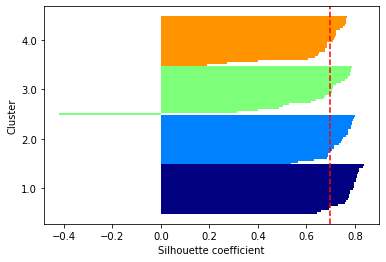

In [305]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

シルエット係数が負の値を示しているサンプルがある。つまり乖離度 < 凝集度となっているサンプルがある。

In [262]:
#データ点の平均値との距離に等しい

def calc_silhouette_vals(X, y_km, model):
    for n in range(X.shape[0]):
        cl_num = self.cluster[n]
        an = np.linalg.norm(X[n] - np.mean(X[self.cluster==cl_num, axis=0]))

        dist = []
        for centroid in self.centroids:
            dist.append(np.linalg.norm(X[n] - centroid))
        
        

SyntaxError: invalid syntax (<ipython-input-262-ab99169a240e>, line 6)

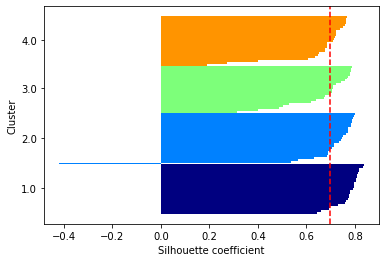

In [263]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X, y_km)

silhouette_avg = np.mean(silhouette_vals)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# クラスタ分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。


#### 《PCAのサンプルコード》

In [264]:
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [265]:
data = data.iloc[:, 2:]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [266]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

#### 《PCAの分散説明率を表示するコードサンプル》

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


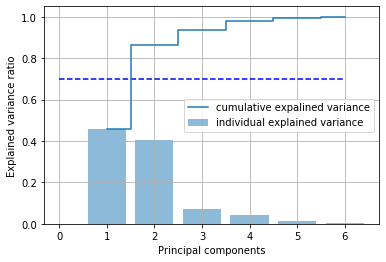

In [267]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。